## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [208]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [209]:
#all data sets
#open from csv the shareholder list as a dataframe
df_investment_rel_angel_startup = pd.read_csv("dataframes/shareholders_list.csv", sep=';')
#open from csv the shareholders as a dataframe
df_angels = pd.read_csv("dataframes/shareholders.csv",sep=';')
#open from csv the startups as a dataframe
df_startups = pd.read_csv("dataframes/startups.csv",sep=';')

In [210]:
df_startups

,company,counts,Industry
0,The Exploration Company,51,NaN
1,Yababa GmbH_Berlin (Charlottenburg),43,NaN
2,Friday Finance GmbH_Berlin (Charlottenburg),31,NaN
3,Mondu GmbH_Berlin (Charlottenburg),29,NaN
4,cureVision,28,NaN
...,...,...,...
130,Software Defined Automation GmbH_München,1,NaN
131,BUILD & CODE GmbH_Potsdam,1,NaN
132,RAMPmedical GmbH_Berlin (Charlottenburg),1,NaN
133,Cryptoticker.io GmbH_Berlin (Charlottenburg),1,NaN


In [211]:
#temp mutations, startup df
#rename counts to number_of_investors
df_startups.rename(columns={'counts':'number_of_investors'}, inplace=True)

#add column number of angels and assign random value
df_startups['number_of_angels'] = np.random.randint(1, 4, df_startups.shape[0])

#add column number of active angel investors and assign random value
df_startups['number_of_active_angels'] = np.random.randint(1, 4, df_startups.shape[0])

categories = [
    "technology_digital_services",
    "production_trade",
    "energy_environment_infrastructure",
    "services_consulting",
    "healthcare"
]
#Add column industry wih random value from categoiries list
df_startups['industry'] = np.random.choice(categories, df_startups.shape[0])

#Add column year of incorporation with random value between 2017 and 2021
df_startups['year_of_incorporation'] = np.random.randint(2017, 2022, df_startups.shape[0])


In [224]:
#temp mutations
#rename column counts to number_of_investments
df_angels.rename(columns={'counts':'number_of_investments'}, inplace=True)
#convert format of number of investments to integer, where it fails, assign 1
df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)

#ADD COLUMN "investment_entity" to df angel and randomly assign "holding" or "person"
df_angels['investment_entity'] = np.random.choice(['holding','person'], df_angels.shape[0])

#Assign random birth dates in daytime format to all df_angels
df_angels['date_of_birth'] = np.random.choice(pd.date_range(start='1/1/1950', end='1/1/2000', freq='D'), df_angels.shape[0])

#Assign random gender to the df_angels male and female
df_angels["gender"]=np.random.choice(["male",'female'], df_angels.shape[0])

#Assigna random value for total particpiation in startups between 0 and 0.15
df_angels['total_participation'] = np.random.uniform(0,0.15, df_angels.shape[0])

#Assign random value for industry_HHI between 0 and 1
df_angels['industry_HHI'] = np.random.uniform(0,1, df_angels.shape[0])

categories = [
    "technology_digital_services",
    "production_trade",
    "energy_environment_infrastructure",
    "services_consulting",
    "healthcare"
]


#Add a column for Eigenvector centrality and assign random value between 0 and 1
df_angels['eigenvector_centrality'] = np.random.uniform(0,1, df_angels.shape[0])

#Add a column for each industry in categorie
for cat in categories:
    df_angels[cat] = np.random.choice([0,1,2,3], df_angels.shape[0])





df_angels

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_21599/2175424140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels.rename(columns={'counts':'number_of_investments'}, inplace=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_21599/2175424140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_21599/2175424140.py:8: SettingWithCopyWarning: 
A val

,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,...,industry_HHI,technology_digital_services,production_trade,energy_environment_infrastructure,services_consulting,healthcare,industry_HHI_angel,status,age,eigenvector_centrality
0,PK Projects GmbH,3,female,NaN,0.071741,1977-02-18,Angel,HRB 117075 B,NaN,NaN,...,0.168253,1,0,0,0,3,26666.666667,active,41.687671,0.825641
1,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,3,male,Landshut,0.012993,1986-03-04,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,...,0.380235,0,0,2,3,3,12222.222222,active,38.652055,0.508449
2,Alvio GmbH,3,female,Berlin,0.015292,1994-09-15,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,...,0.365133,1,2,2,3,0,26666.666667,active,35.969863,0.049734
3,Rivus Ventures GmbH,2,female,München,0.028980,1960-07-01,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,...,0.529447,3,1,0,2,0,0.000000,active,45.657534,0.619109
4,Mercutio GmbH,2,male,Berlin,0.143370,1988-04-25,founder,HRB 107123,NaN,NaN,...,0.289164,1,1,3,0,2,45000.000000,active,22.186301,0.325255
5,AKVaganza Unternehmergesellschaft (haftungsbes...,2,male,Düsseldorf,0.044822,1982-08-22,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,...,0.880287,3,1,1,2,3,70000.000000,active,39.383562,0.950754
6,ROMM Holding GmbH,2,female,Berlin,0.029251,1985-08-03,VC,HRB 145775,NaN,NaN,...,0.965636,3,0,0,0,0,40000.000000,active,52.380822,0.952882
7,Roskopf Ventures GmbH,2,female,Berlin,0.029900,1959-05-23,Angel,HRB 126690,NaN,NaN,...,0.106918,2,0,1,1,0,65000.000000,active,51.589041,0.731814
8,WENVEST Capital GmbH,2,male,Potsdam,0.025471,1999-10-05,founder,NaN,NaN,NaN,...,0.303222,2,1,2,2,2,57500.000000,active,71.457534,0.420102
9,Atlantic Food Labs Vintage GmbH & Co. KG,2,female,Berlin,0.021696,1995-07-19,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,...,0.094436,1,2,2,3,1,67500.000000,active,50.846575,0.911585


## Creating a Network Graph - 1

In [227]:
# get a list of co-investments

# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='company')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['name_x'] != co_investments['name_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['name_x', 'name_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts['name_x'] = co_investment_counts['name_x'].str.replace(' ', '_')
co_investment_counts['name_y'] = co_investment_counts['name_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)

                                    name_x  \
15711  btov_Digital_Technologies_li_S.C.S.   
4912                           FJ_Labs_Ill   
3107                            Creandum_V   
9667                         Mercutio_GmbH   
10547                     PK_Projects_GmbH   
...                                    ...   
5412                 Fluss_des_Lebens_GmbH   
5413                 Fluss_des_Lebens_GmbH   
5414                 Fluss_des_Lebens_GmbH   
5415                 Fluss_des_Lebens_GmbH   
16205      wrapall_UG_(haftungsbeschrankt)   

                                          name_y  CoInvestments  
15711        btov_Digital_Technologies_II_S.C.S.              2  
4912         btov_Digital_Technologies_II_S.C.S.              2  
3107         btov_Digital_Technologies_II_S.C.S.              2  
9667                           ROMM_Holding_GmbH              2  
10547                                  Lino_GmbH              2  
...                                          ...   

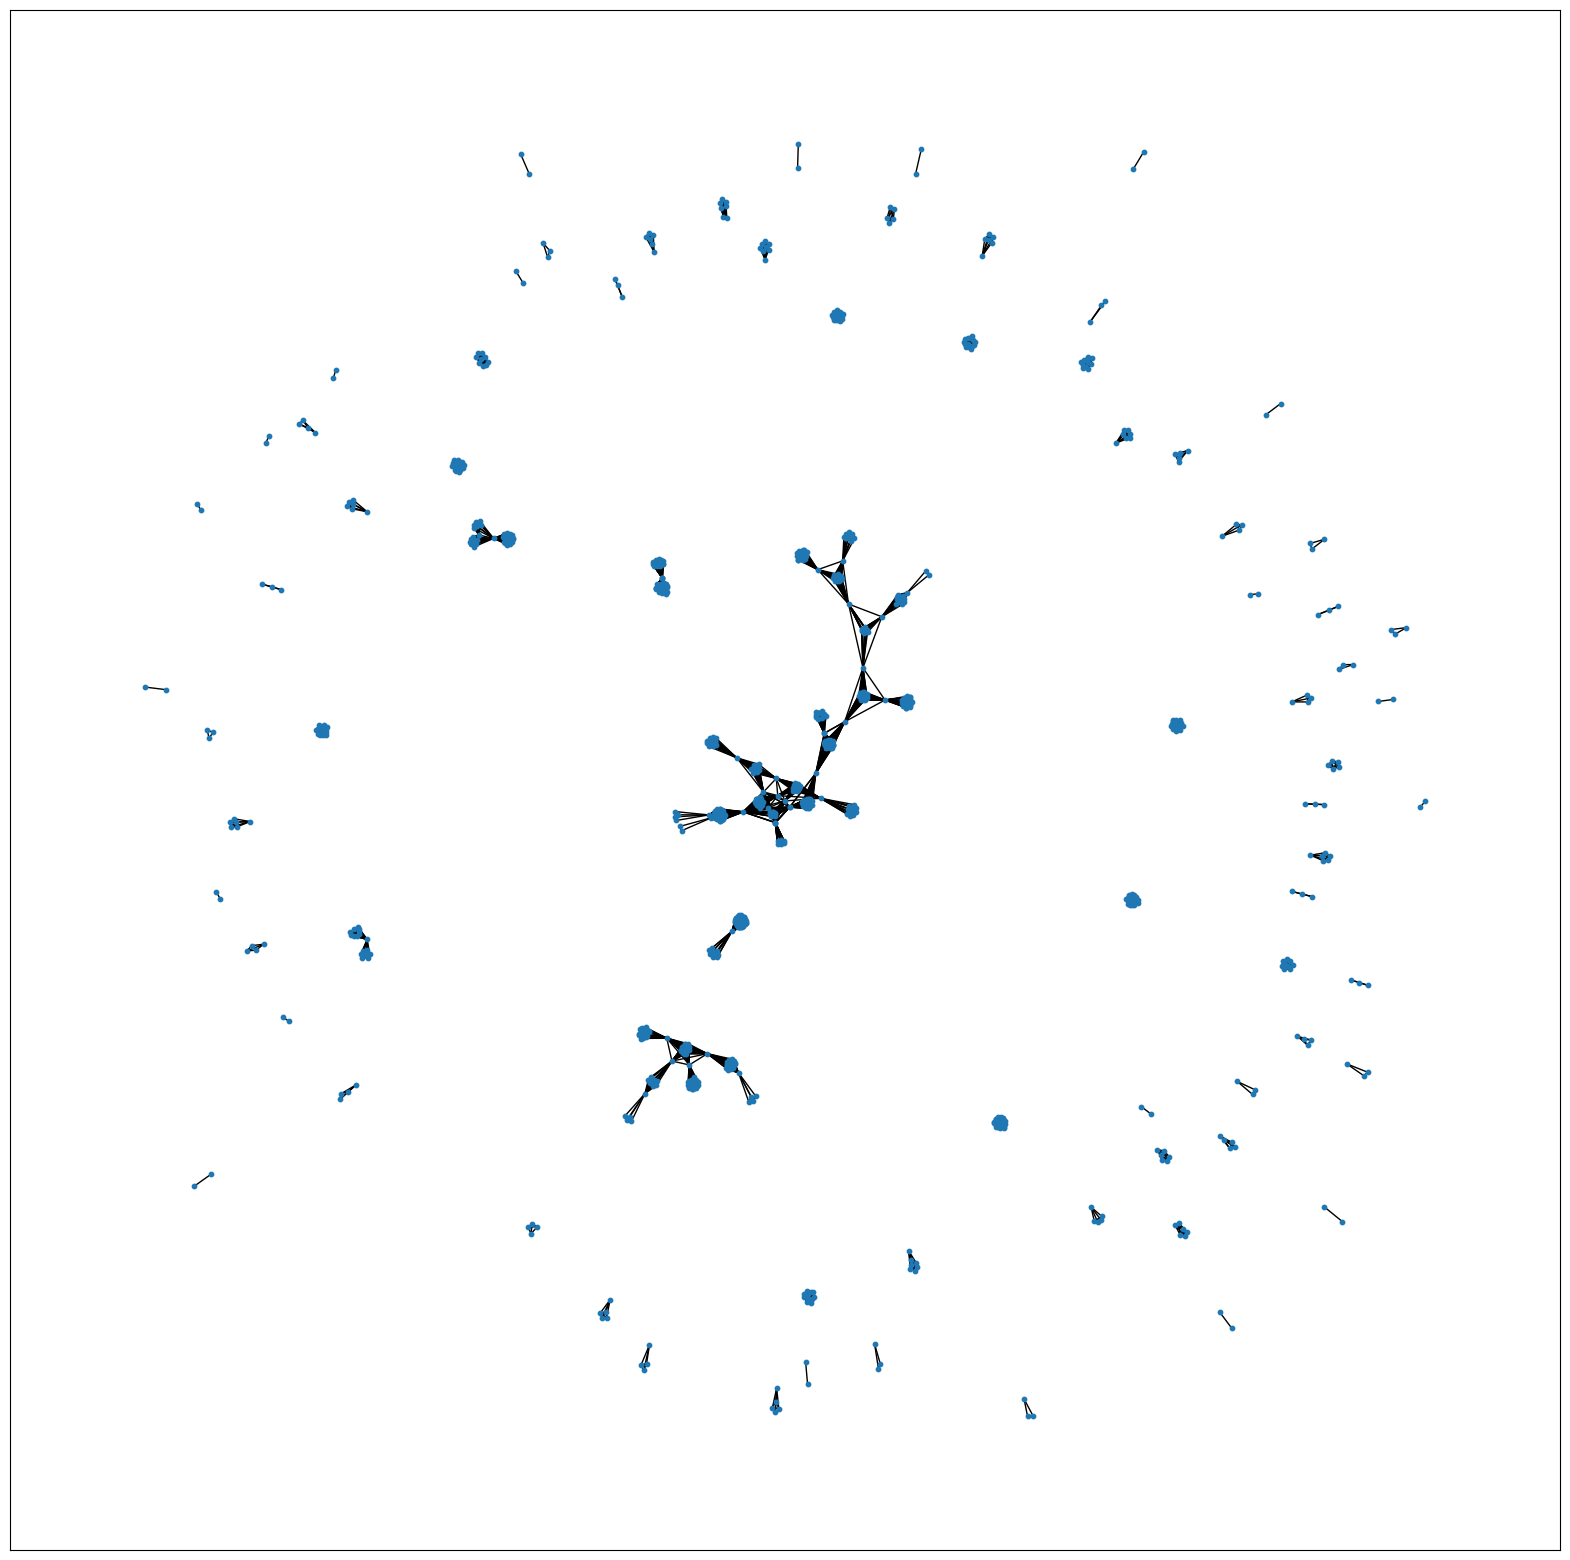

In [214]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'name_x', 'name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


## **Descriptive Statistics** - 2

Descriptive Statistics on Angels

In [215]:
#prepare industry columns for industry_HHI

#get columns of df_angels technology_digital_services, production_trade, energy_environment_infrastructure, services_consulting, healthcare
df_angels['technology_digital_services']=df_angels['technology_digital_services']/df_angels['number_of_investments']*100
df_angels['production_trade']=df_angels['production_trade']/df_angels['number_of_investments']*100
df_angels['energy_environment_infrastructure']=df_angels['energy_environment_infrastructure']/df_angels['number_of_investments']*100
df_angels['services_consulting']=df_angels['services_consulting']/df_angels['number_of_investments']*100
df_angels['healthcare']=df_angels['healthcare']/df_angels['number_of_investments']*100

df_angels['industry_HHI_angel']= df_angels[['technology_digital_services','production_trade','energy_environment_infrastructure','services_consulting','healthcare']].apply(lambda x: np.sum(np.square(x)), axis=1)

df_angels


,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,investment_entity,industry_HHI,technology_digital_services,production_trade,energy_environment_infrastructure,services_consulting,healthcare,industry_HHI_angel
0,PK Projects GmbH,3,male,NaN,0.078584,1980-05-04,Angel,HRB 117075 B,NaN,NaN,holding,0.197428,100.000000,66.666667,100.000000,33.333333,33.333333,26666.666667
1,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,3,male,Landshut,0.079295,1983-05-17,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,person,0.878766,33.333333,33.333333,33.333333,66.666667,66.666667,12222.222222
2,Alvio GmbH,3,male,Berlin,0.067908,1986-01-20,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,person,0.826832,66.666667,100.000000,33.333333,33.333333,100.000000,26666.666667
3,Rivus Ventures GmbH,2,female,München,0.011567,1976-05-16,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,holding,0.683136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Mercutio GmbH,2,female,Berlin,0.032088,1999-10-30,founder,HRB 107123,NaN,NaN,person,0.177616,100.000000,0.000000,150.000000,100.000000,50.000000,45000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,PDA Deutzclie one rales Digitalagentur GmbH,1,female,Berlin,0.087607,1963-12-04,Angel,HRB 146584 B,NaN,NaN,person,0.161038,200.000000,200.000000,200.000000,300.000000,100.000000,220000.000000
981,Dicki GmbH,1,male,München,0.123309,1989-04-09,VC,HRB 188883 Munchen,NaN,NaN,holding,0.676650,200.000000,0.000000,0.000000,300.000000,200.000000,170000.000000
982,Jiinger Invest UG,1,male,München,0.000814,1983-08-06,founder,HRB 223107 Munchen,NaN,NaN,holding,0.968302,300.000000,300.000000,300.000000,0.000000,0.000000,270000.000000
983,Lata Venture GmbH,1,female,München,0.046359,1978-11-14,founder,"ne Munchen, MGnchen",NaN,NaN,person,0.823587,200.000000,200.000000,300.000000,200.000000,0.000000,210000.000000


In [226]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

#assign a label to each angel in a new column "status", where you assign the label active if the angel has more than 2 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[3] = ["total_number_of_active_angels", total_number_of_active_angels]

#only consider active angels
df_angels = df_angels[df_angels['status'] == 'active']

#Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_entity'] == 'holding'])
# add them to df
df_angel_descriptive.loc[4] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_entity'] == 'person'])
# add them to df
df_angel_descriptive.loc[5] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

#share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/total_number_of_active_angels
# add them to df
df_angel_descriptive.loc[6] = ["share_of_investments_through_holding", share_of_investments_through_holding]

# calculate age based on birthdate and add to df_angel
df_angels['date_of_birth'] = pd.to_datetime(df_angels['date_of_birth'])
date = datetime(2021,12,31)
df_angels['age'] =((date - df_angels['date_of_birth']).dt.days)/365
#calculate mean age of angels and add to df_angel_descriptive with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels['age'].mean()
# add them to df
df_angel_descriptive.loc[7] = ["mean_age_of_angels", mean_age_of_angels]

#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[8] = ["number_of_male_angels", number_of_male_angels_active]

#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[9] = ["number_of_female_angels", number_of_female_angels_active]

#Calculate average number of investment per active angel and add to df_angel_descriptive with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels['number_of_investments'].mean()
# add them to df
df_angel_descriptive.loc[10] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]

#Calculate median number of investment per active angel and add to df_angel_descriptive with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels['number_of_investments'].median()
# add them to df
df_angel_descriptive.loc[11] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]

#Calculate average inustry_HHI per active angel and add to df_angel_descriptive with variable name "average_inustry_HHI_per_active_angel"
average_inustry_HHI = df_angels['industry_HHI'].mean()
# add them to df
df_angel_descriptive.loc[12] = ["average_industry_HHI", average_inustry_HHI]

#Calculate average industry HHI across angels and add to df_angel_descriptive with variable name "average_industry_HHI_across_angels"
average_industry_HHI_across_angels = df_angels['industry_HHI_angel'].mean()
# add them to df
df_angel_descriptive.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

#Calculate average eigenvector centrality across angels and add to df_angel_descriptive with variable name "average_eigenvector_centrality_across_angels"
average_eigenvector_centrality_across_angels = df_angels['eigenvector_centrality'].mean()
# add them to df
df_angel_descriptive.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angel_descriptive

,variable,value
0,total_number_of_angels,46.000000
1,number_of_male_angels,22.000000
2,number_of_female_angels,24.000000
3,total_number_of_active_angels,46.000000
4,number_of_angels_investing_through_a_holding,25.000000
5,number_of_angels_investing_as_a_person,21.000000
6,share_of_investments_through_holding,0.543478
7,mean_age_of_angels,42.345742
8,number_of_male_angels,22.000000
9,number_of_female_angels,24.000000


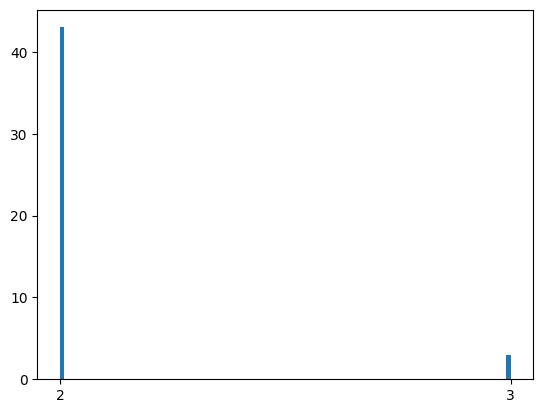

In [223]:
#Plot distribution of number of investments per angel
plt.hist(df_angels['number_of_investments'], bins=100)
# only plot whole numbers on x-axis
plt.xticks(np.arange(min(df_angels['number_of_investments']), max(df_angels['number_of_investments'])+1, 1.0))
#export to png as "Number of investments.png"
plt.savefig('graphs/Distribution of number of investments.png')


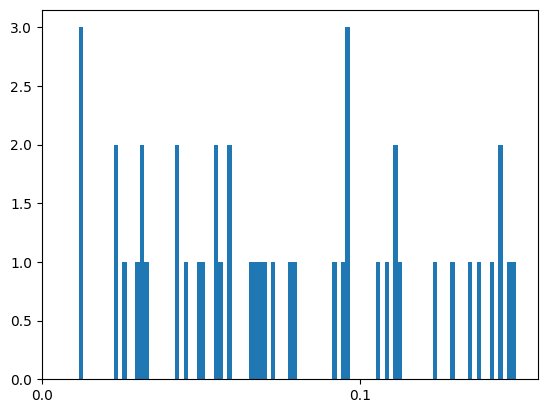

In [218]:
#plot distribution of average shares in their investments including decimals
plt.hist(df_angels['total_participation'], bins=100)
# plot also decimals on X-axis from 0 to 0.2
plt.xticks(np.arange(0, 0.2, 0.1))
#export to png as "Distribution of average shares of angels.png"
plt.savefig('graphs/Distribution of average shares of angels.png')


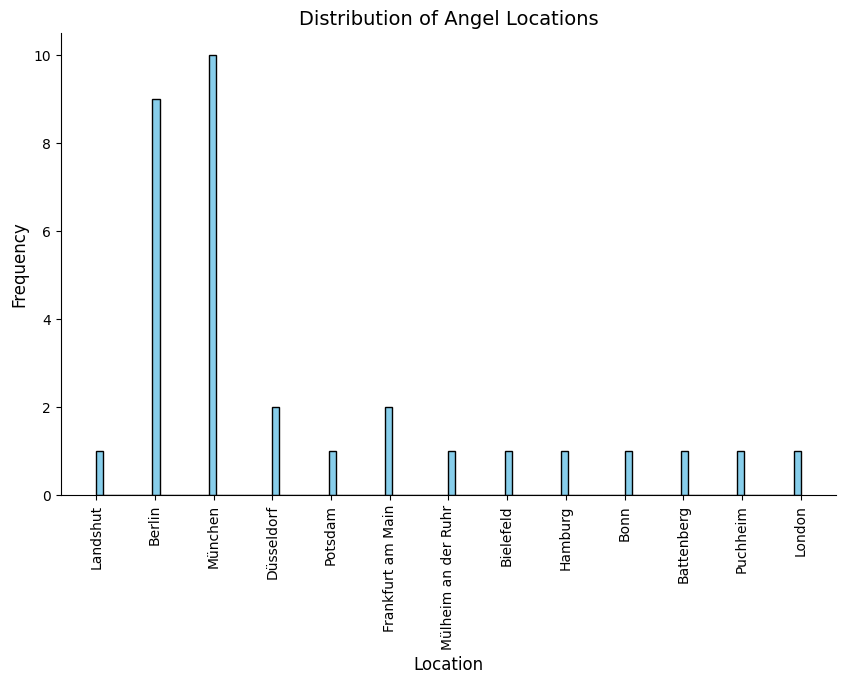

<Figure size 640x480 with 0 Axes>

In [219]:
import matplotlib.pyplot as plt

# Drop NaN values
data = df_angels['location'].dropna()

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the histogram with a color
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Angel Locations', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

#export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png')

## Descriptive Statistics on Startups

In [220]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels

df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[0] = ["total_number_of_startups", total_number_of_startups]

#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_of_investors'].mean()
df_startup_descriptive.loc[1] = ["average_number_of_angel_investors", average_number_of_angel_investors]

#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_of_investors'].median()
df_startup_descriptive.loc[2] = ["median_number_of_angel_investors", median_number_of_angel_investors]

#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_of_angels'].mean()
df_startup_descriptive.loc[3] = ["average_number_of_angels", average_number_of_angels]

#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_of_angels'].median()
df_startup_descriptive.loc[4] = ["median_number_of_angels", median_number_of_angels]

#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_active_angels = df_startups['number_of_active_angels'].median()
df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



,variable,value
0,total_number_of_startups,135.000000
1,average_number_of_angel_investors,7.666667
2,median_number_of_angel_investors,4.000000
3,average_number_of_angels,2.059259
4,median_number_of_angels,2.000000
5,average_number_of_active_angels,2.066667
6,median_number_of_active_angels,2.000000


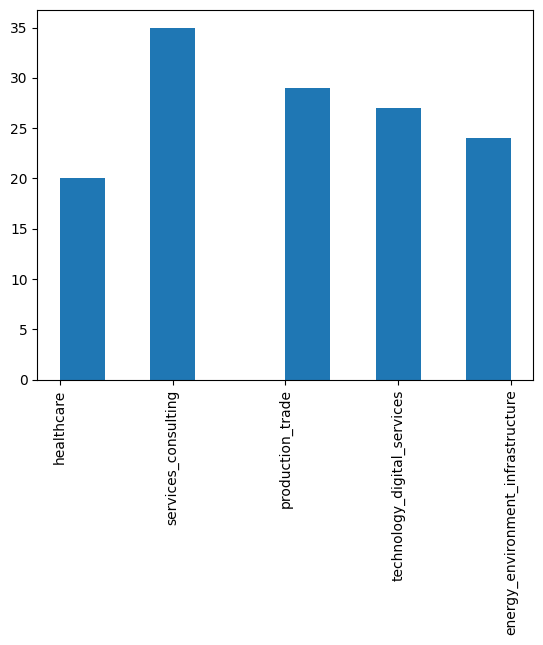

In [221]:
#Plot startups per industry
plt.hist(df_startups['industry'], bins=10)
#plot all industries
plt.xticks(rotation=90)

#export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png')

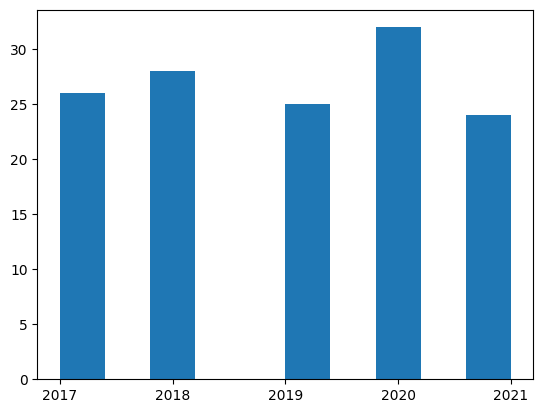

In [222]:
#Plot startups per year of incorporation
plt.hist(df_startups['year_of_incorporation'], bins=10)
#plot all years, make 1 year jumps, no decimals, make the bars thicker
plt.xticks(np.arange(min(df_startups['year_of_incorporation']), max(df_startups['year_of_incorporation'])+1, 1.0))

#export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png')

## Network metrics



In [228]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']



# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='company')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['name_x'] != co_investments['name_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['name_x', 'name_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts['name_x'] = co_investment_counts['name_x'].str.replace(' ', '_')
co_investment_counts['name_y'] = co_investment_counts['name_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


                                       name_x  \
91                                  Lino_GmbH   
52      Entrepreneur_First_Operations_Limited   
68                Herr_Saravanan_Jaichandaran   
35         Companisto_Trust_Service_XVII_GmbH   
36         Companisto_Trust_Service_XVII_GmbH   
..                                        ...   
80                              La_Plata_GmbH   
82                              La_Plata_GmbH   
83                              La_Plata_GmbH   
84                              La_Plata_GmbH   
181  eNugget_Ventures_UG_(haftungsbeschrankt)   

                                         name_y  CoInvestments  
91                             PK_Projects_GmbH              2  
52     eNugget_Ventures_UG_(haftungsbeschrankt)              2  
68                      Herr_Ashok_Varadharajan              2  
35   Alexander_Ludwig_Friedrich_Christian_Fuchs              2  
36            Dr._Alfred_Heinrich_Georg_Spieker              2  
..                   

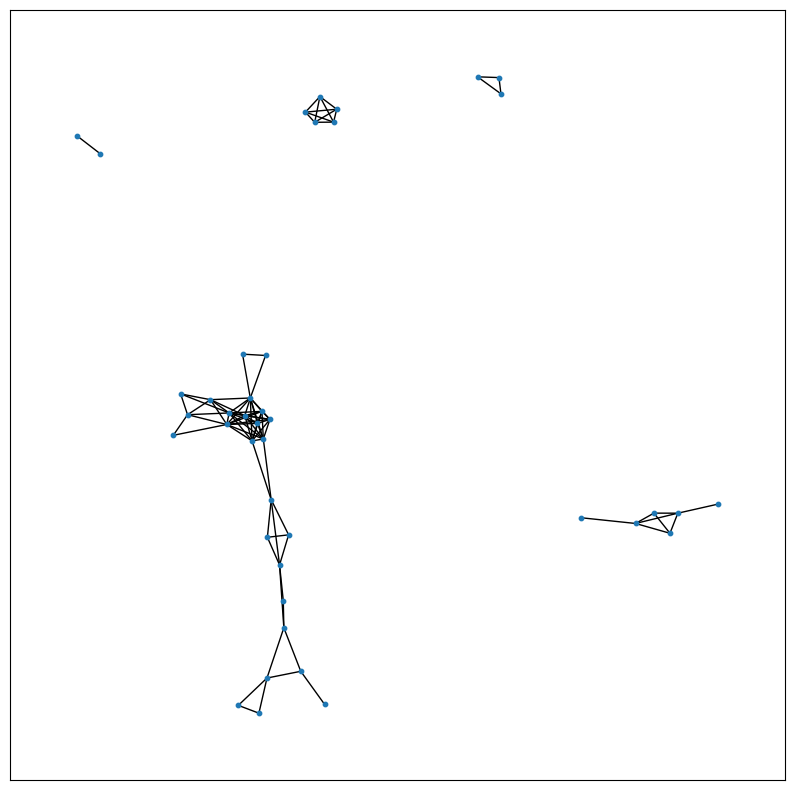

In [230]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'name_x', 'name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [237]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]

df_network_descriptive

,variable,value
0,total_number_of_nodes,42.000000
1,total_number_of_edges,91.000000
2,average_degree,4.333333
3,median_degree,4.000000
4,average_clustering_coefficient,0.723220
5,median_clustering_coefficient,0.723220
8,average_eigenvector_centrality,0.084189
9,median_eigenvector_centrality,0.000967
10,average_betweenness_centrality,0.020993
11,median_betweenness_centrality,0.000000


## Simulating a network - 3



In [ ]:
#Tbd

## Detecting communities - 4



In [ ]:
#tbd

## Analysis of similarity within communities - 5


In [3]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])
    hhi=hhi/10000
    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 0.26
